In [1]:
pip install ib_insync

In [83]:
from ib_insync import *

# Utilize an instance of IB
ib = IB()

# Connect to the IB server using await in front of the connectAsync method
try:
    await ib.connectAsync('127.0.0.1', 7497, clientId=1)
    print("Connected to Interactive Brokers API")
except Exception as e:
    print("There has is an error when connecting to IB API")

Connected to Interactive Brokers API


In [84]:
from ib_insync import *
import pytz
import pandas as pd
contract = Future('ES', '202406', 'CME')

await ib.qualifyContractsAsync(contract)
# Assume 'ib' is already connected and is an instance of ib_insync.IB()
# Also assume 'contract' has been created and is a valid ib_insync.Contract object

# Use the asynchronous version of the method with await
try:
    historical_data = await ib.reqHistoricalDataAsync(
        contract, endDateTime='', durationStr='30 D',
        barSizeSetting='1 hour', whatToShow='MIDPOINT', useRTH=True
    )
    
    # Proceed with the historical data
#     for bar in historical_data:
#         print(bar)
except Exception as e:
    print(f"An error occurred: {e}")



# Assuming 'historical_data' contains the historical data returned by reqHistoricalDataAsync

# Convert timestamps to the desired time zone (e.g., 'US/Eastern')
tz = pytz.timezone('US/Eastern')
for bar in historical_data:
    bar.date = bar.date.astimezone(tz)

# Convert historical data to DataFrame
df = pd.DataFrame([vars(bar) for bar in historical_data])

# Print the DataFrame
print(df)
market_data = ib.reqMktData(contract)
print(market_data.bid)
print(market_data.ask)

                         date     open     high      low    close  volume  \
0   2024-03-19 09:30:00-04:00  5205.75  5206.25  5195.00  5200.75    -1.0   
1   2024-03-19 10:00:00-04:00  5200.75  5210.00  5195.50  5206.00    -1.0   
2   2024-03-19 11:00:00-04:00  5206.00  5218.50  5205.25  5215.75    -1.0   
3   2024-03-19 12:00:00-04:00  5215.75  5235.75  5213.75  5231.25    -1.0   
4   2024-03-19 13:00:00-04:00  5231.25  5239.00  5227.75  5234.25    -1.0   
..                        ...      ...      ...      ...      ...     ...   
232 2024-04-30 09:30:00-04:00  5130.75  5141.25  5127.00  5137.25    -1.0   
233 2024-04-30 10:00:00-04:00  5137.25  5141.25  5126.25  5131.75    -1.0   
234 2024-04-30 11:00:00-04:00  5131.75  5132.00  5105.00  5111.00    -1.0   
235 2024-04-30 12:00:00-04:00  5111.00  5115.25  5092.50  5097.75    -1.0   
236 2024-04-30 13:00:00-04:00  5097.75  5107.50  5091.50  5106.00    -1.0   

     average  barCount  
0       -1.0        -1  
1       -1.0        -1  


Error 10168, reqId 5: Requested market data is not subscribed. Delayed market data is not enabled., contract: Future(conId=551601561, symbol='ES', lastTradeDateOrContractMonth='20240621', multiplier='50', exchange='CME', currency='USD', localSymbol='ESM4', tradingClass='ES')


In [44]:
# df = util.df(historical_data)
# print(df)
#Historical future price data last updated on 4/26/2024, the inclusion of method shows an implementation of how the data is preprocessed
def preprocess_and_save_data(data, filename):
    data.to_csv(filename, index=False)
# preprocess_and_save_data(df, 'ib_es500_price_history.csv')

In [15]:
!pip install nest_asyncio

2024-04-30 14:17:43.478627: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-30 14:17:43.480137: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-30 14:17:43.481509: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2024-04-30 14:17:43.957308: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-30 14:17:43.959189: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-30 14:17:43.960630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/5 [=================>............] - ETA: 0s - loss: 0.1379 

2024-04-30 14:17:47.350045: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-30 14:17:47.351718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-30 14:17:47.353304: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

5/5 [==============================] - 4s 203ms/step - loss: 0.1069 - val_loss: 0.0656
Epoch 2/50
5/5 [==============================] - 0s 48ms/step - loss: 0.0410 - val_loss: 0.0210
Epoch 3/50
5/5 [==============================] - 0s 41ms/step - loss: 0.0327 - val_loss: 0.0294
Epoch 4/50
5/5 [==============================] - 0s 40ms/step - loss: 0.0250 - val_loss: 0.0111
Epoch 5/50
5/5 [==============================] - 0s 39ms/step - loss: 0.0213 - val_loss: 0.0126
Epoch 6/50
5/5 [==============================] - 0s 35ms/step - loss: 0.0225 - val_loss: 0.0123
Epoch 7/50
5/5 [==============================] - 0s 41ms/step - loss: 0.0181 - val_loss: 0.0104
Epoch 8/50
5/5 [==============================] - 0s 34ms/step - loss: 0.0168 - val_loss: 0.0098
Epoch 9/50
5/5 [==============================] - 0s 38ms/step - loss: 0.0156 - val_loss: 0.0090
Epoch 10/50
5/5 [==============================] - 0s 41ms/step - loss: 0.0126 - val_loss: 0.0086
Epoch 11/50
5/5 [======================

2024-04-30 14:17:57.389855: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-30 14:17:57.391806: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-30 14:17:57.393070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2/2 [==============================] - 1s 9ms/step


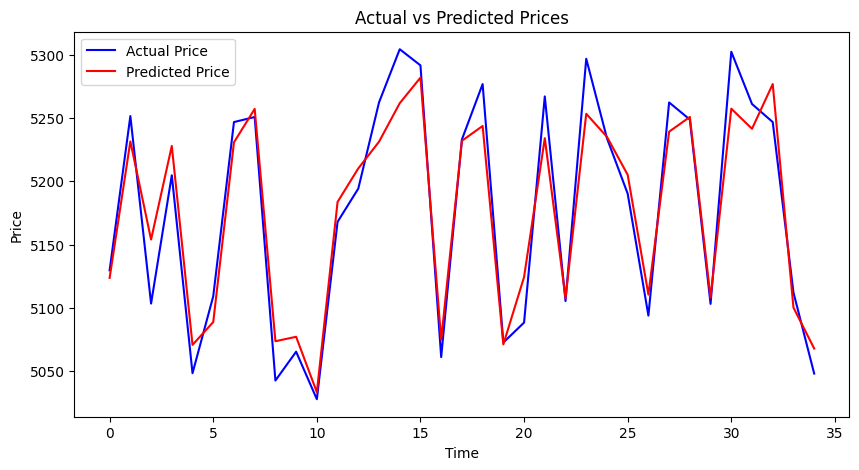

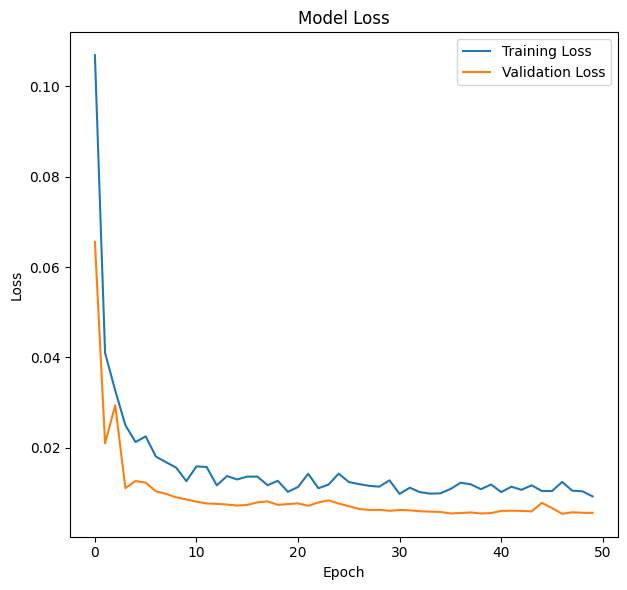

Error 10168, reqId 9: Requested market data is not subscribed. Delayed market data is not enabled., contract: Future(symbol='ES', lastTradeDateOrContractMonth='202406', exchange='CME')


1/1 [==============================] - 0s 21ms/step
5139.609574712814 nan
Decision: HOLD, Shares: 0, Predicted Price: 5139.609574712814
Decision is to HOLD, no action taken.
Order HOLD for 0 shares has been filled.


In [87]:
import nest_asyncio
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
nest_asyncio.apply()
# Load and preprocess data
def load_and_preprocess_data(filepath):
    data = pd.read_csv(filepath)
    features = data[['close', 'high', 'low', 'volume']].values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_features = scaler.fit_transform(features)
    return scaled_features, scaler

# Create sequences for LSTM training
def create_sequences(data, sequence_length=60):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:(i + sequence_length)]
        y = data[i + sequence_length, 0]  # Predicting the next close price
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define LSTM model structure
def build_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Adjust the prediction function to handle new features
def predict_and_decide(model, scaler, recent_data, current_price, available_funds, current_shares, total_cost, transaction_fee=2.25):
#     if recent_data.shape[0] != 60:
#         raise ValueError("recent_data should contain exactly 60 timesteps")
    
#     # Scale the recent_data if it's not already scaled
#     scaled_recent_data = scaler.transform(recent_data)
#     scaled_recent_data = scaled_recent_data.reshape(1, 60, -1)  # Reshape for LSTM input
#     prediction = model.predict(scaled_recent_data)
#     predicted_price = scaler.inverse_transform(prediction)[0][0]
    # Assuming recent_data is in the correct shape and already scaled appropriately
    scaled_recent_data = recent_data.reshape(1, 60, -1)  # Reshape for LSTM input
    
    prediction_scaled = model.predict(scaled_recent_data)
    # Since we're only interested in the 'close' price (first feature), we need to prepare a dummy array for inverse transform
    dummy_features = np.zeros((1, 4))  # Assume 4 features as per your scaler fitting
    dummy_features[0, 0] = prediction_scaled[0][0]  # Place the predicted price in the 'close' position
    
    predicted_price = scaler.inverse_transform(dummy_features)[0, 0]  # Inverse transform and extract the 'close' price
    print(predicted_price, current_price)
    # Decision making with transaction fees considered
    decision = "HOLD"
    shares = 0
    if predicted_price > current_price:
        if available_funds > transaction_fee and available_funds / current_price >= 50:
            max_affordable_shares = int((available_funds * 0.3 - transaction_fee) / current_price)
            decision = "BUY"
            shares = max_affordable_shares  # Example: Buy as much as possible within budget
    elif predicted_price < current_price:
        decision = "SELL"
        shares = int(current_shares * 0.1)  # Example: Sell 10% of holdings
        
    return decision, shares, predicted_price

#Plotting model learning
def plot_model_learning(history, learning_rate_schedule=None):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    if learning_rate_schedule is not None:
        plt.subplot(1, 2, 2)
        plt.plot(learning_rate_schedule, label='Learning Rate')
        plt.title('Learning Rate Schedule')
        plt.xlabel('Epoch')
        plt.ylabel('Learning Rate')
        plt.legend()

    plt.tight_layout()
    plt.show()
    
# Function to inverse transform prices
# def inverse_transform_prices(scaler, prices):
#     dummy_features = np.zeros((len(prices), 4))  # Prepare dummy features array with 4 features
#     dummy_features[:, 3] = prices.squeeze()  # Insert prices into the last column
#     original_prices = scaler.inverse_transform(dummy_features)[:, 3]
#     return original_prices
def inverse_transform_price(scaler, price, n_features):
    # Create a dummy array with the same number of features
    dummy = np.zeros((len(price), n_features))
    # Place the price in the correct column (assuming 'close' is the first column)
    dummy[:, 0] = price
    # Inverse transform and return the correct column
    return scaler.inverse_transform(dummy)[:, 0]

# Plot predictions
def plot_predictions(actual, predicted):
    plt.figure(figsize=(10, 5))
    plt.plot(actual, label='Actual Price', color='blue')
    plt.plot(predicted, label='Predicted Price', color='red')
    plt.title('Actual vs Predicted Prices')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Example usage of the functions
if __name__ == "__main__":
    filepath = 'ib_es500_price_history.csv'
    scaled_features, scaler = load_and_preprocess_data(filepath)
    X, y = create_sequences(scaled_features)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = build_model((X_train.shape[1], X_train.shape[2]))
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))  # Reduced epochs, added explicit test data for validation
    
    # Generate and plot predictions
    
    predicted_scaled = model.predict(X_test)

    # Inverse transform predictions and actual values
    predicted_prices = inverse_transform_price(scaler, predicted_scaled.flatten(), 4)
    actual_prices = inverse_transform_price(scaler, y_test, 4)

    # Plotting function remains the same
    plot_predictions(actual_prices, predicted_prices)

    # Display training and validation loss
    plot_model_learning(history)

    # Simulating a scenario for prediction and decision making
    positions = ib.positions()
    for pos in positions:
        if pos.contract.symbol == 'ES' and pos.contract.secType == 'FUT':
            current_shares = pos.position
    account_summary = await ib.accountSummaryAsync()
    # Find the total cash balance
    balance = next((item for item in account_summary if item.tag == 'TotalCashBalance'), None)
    
    contract = Future('ES', '202406', 'CME')
    market_data = ib.reqMktData(contract, '', False, False)
    util.sleep(5)
    current_price = (market_data.bid + market_data.ask) / 2
    
    
    available_funds = balance.value
    total_cost = current_shares * current_price  # Simulated total cost of current shares
    
    # Prepare recent data for prediction
    recent_data = scaled_features[-60:]  # Make sure this is exactly 60 timesteps
    decision, shares, predicted_price = predict_and_decide(model, scaler, recent_data, current_price, available_funds, current_shares, total_cost)
    print(f"Decision: {decision}, Shares: {shares}, Predicted Price: {predicted_price}")
    
    # Execute the decision
    if decision == "BUY":
        order = MarketOrder('BUY', shares)
        trade = ib.placeOrder(contract, order)
    elif decision == "SELL":
        order = MarketOrder('SELL', shares)
        trade = ib.placeOrder(contract, order)
    elif decision == "HOLD":
        print("Decision is to HOLD, no action taken.")

    # Monitor the order until it is filled
    ib.sleep(1)  # Sleeping to give time for the order to be executed


    print(f"Order {decision} for {shares} shares has been filled.")